In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score

from preprocessing import preprocess
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
path = "/media/venchislav/Говорящий Том/RealProjects/RealEstateWebSite/data_science/Data/train.csv"
X_train, X_test, y_train, y_test = preprocess(path)

In [4]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.168981,-0.175775,-1.574468,0.250000,0.0,0.940652,0.0,-0.500423,0.518119,0.324906,1.274725,1.111957,0.000000,-2.000000,0.000000,0.632353,0.0,0.0,10.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,1.0,2.0,2.0,0.0,4.0,5.0,1.0,1.0,7.0,8.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,0.0,2.0,0.0,2.0,2.0,4.0,2.0,3.0,7.0,6.0,0.0,2.0,1.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
1,-0.537402,0.315036,-1.574468,0.166667,0.0,-0.546827,0.0,-0.818259,-1.973555,-0.757491,0.824176,-0.268088,0.000000,-2.000000,1.309524,1.279412,210.0,0.0,14.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,1.0,5.0,3.0,5.0,1.0,1.0,7.0,8.0,3.0,4.0,0.0,2.0,3.0,3.0,2.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,3.0,5.0,6.0,0.0,2.0,1.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,7.0,2.0,8.0,4.0
2,-0.274244,-0.178201,0.659574,0.305556,0.0,-0.513894,0.0,1.355875,0.592556,0.396067,0.000000,-0.243717,0.657114,-0.333333,0.000000,-0.397059,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,6.0,3.0,1.0,1.0,11.0,13.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,2.0,4.0,6.0,1.0,2.0,1.0,0.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,6.0,0.0,6.0,5.0
3,0.620493,0.433190,0.319149,-0.138889,2.0,0.030875,0.0,-0.165680,-0.392752,0.143258,1.108516,0.779893,0.257114,0.395833,0.000000,0.838235,0.0,0.0,5.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,1.0,8.0,10.0,2.0,4.0,1.0,2.0,3.0,0.0,2.0,5.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,5.0,6.0,1.0,4.0,1.0,0.0,2.0,4.0,4.0,2.0,9.0,0.0,0.0,0.0,1.0,8.0,4.0
4,-0.432139,-0.506217,0.638298,0.277778,0.0,0.494683,0.0,-0.683009,-0.330069,-0.439139,1.001374,0.187357,0.632114,-0.341667,0.595238,0.705882,0.0,0.0,5.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,5.0,3.0,1.0,1.0,11.0,13.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,6.0,6.0,1.0,4.0,1.0,0.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,3.0,2.0,8.0,4.0


In [5]:
X_train.shape

(1168, 74)

## **Linear Regression**

In [6]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
y_train.shape, X_train.shape[0]

((1168,), 1168)

In [8]:
y_test.shape, X_test.shape[0]

((292,), 292)

In [9]:
lin_reg.predict(X_train.iloc[:5, :])

array([144310.66428242,  87018.03575104, 218779.6414418 , 235459.78379151,
       181810.96700014])

In [10]:
y_train[:5]

921     145900
520     106250
401     164990
280     228500
1401    193000
Name: SalePrice, dtype: int64

In [11]:
root_mean_squared_error(y_train, lin_reg.predict(X_train))

30644.240570564696

In [12]:
r2_score(y_train, lin_reg.predict(X_train))

0.8458574918554835

bigger value indicate better fit.

In [13]:
r2_score(y_test, lin_reg.predict(X_test))

0.7984661474242603

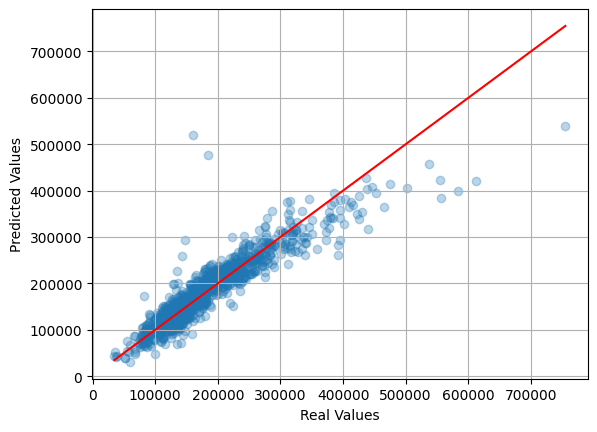

In [14]:
plt.grid()
plt.plot(range(min(y_train), max(y_train)), range(min(y_train), max(y_train)), c="red")
plt.scatter(y_train, lin_reg.predict(X_train), alpha=0.3)

plt.xlabel("Real Values")
plt.ylabel("Predicted Values")

plt.show();

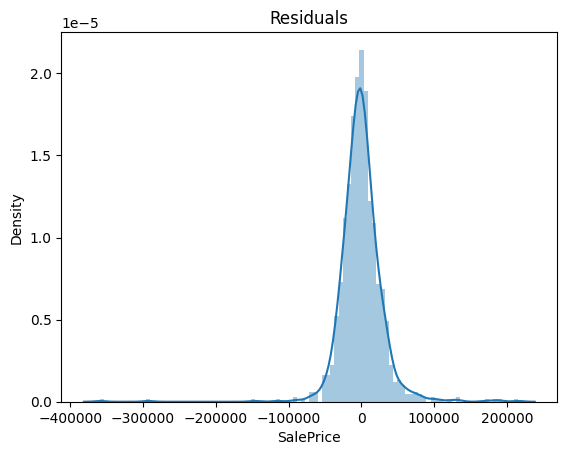

In [15]:
residuals = y_train - lin_reg.predict(X_train)
plt.title("Residuals")
sns.distplot(residuals, bins = 100);

In [20]:
cross_val_score(lin_reg, X_train, y_train, cv=3).mean()

0.7626358686070048

## **KNN Regressor**

In [23]:
knn_regr = KNeighborsRegressor()
knn_regr.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
root_mean_squared_error(y_train, knn_regr.predict(X_train))

43387.73874515994

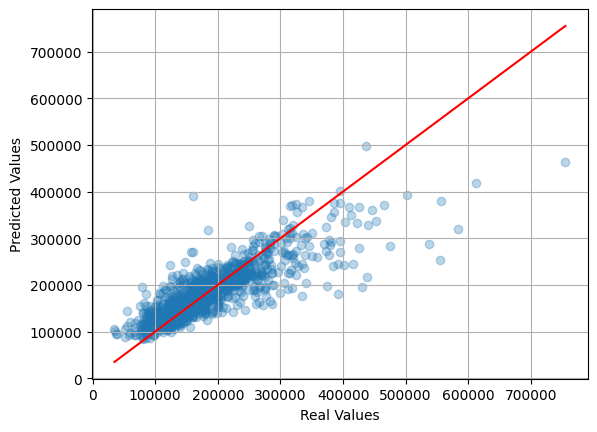

In [26]:
plt.grid()
plt.plot(range(min(y_train), max(y_train)), range(min(y_train), max(y_train)), c="red")
plt.scatter(y_train, knn_regr.predict(X_train), alpha=0.3)

plt.xlabel("Real Values")
plt.ylabel("Predicted Values")

plt.show();

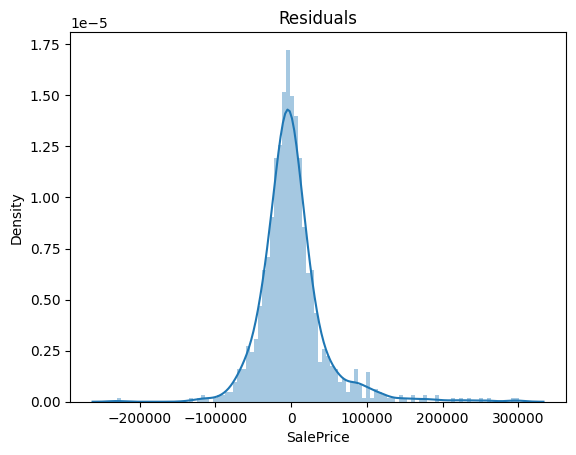

In [27]:
residuals = y_train - knn_regr.predict(X_train)
plt.title("Residuals")
sns.distplot(residuals, bins = 100);

In [28]:
cross_val_score(knn_regr, X_train, y_train, cv=3).mean()

0.5105353921619754

In [30]:
r2_score(y_test, knn_regr.predict(X_test))

0.6201356128105973

# **Black Boxes**
## **RandomForestRegressor**

In [47]:
forest = RandomForestRegressor()

In [48]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
train_prediction = forest.predict(X_train)
test_prediction = forest.predict(X_test)

In [51]:
print(root_mean_squared_error(y_train, train_prediction))
print(root_mean_squared_error(y_test, test_prediction))

11918.076548720584
27512.389577595986


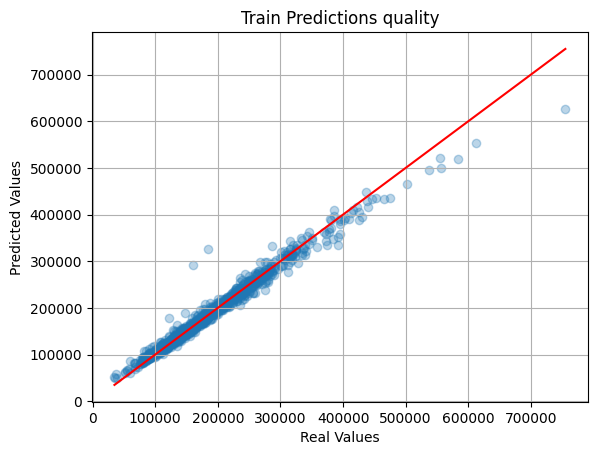

In [53]:
plt.grid()
plt.plot(range(min(y_train), max(y_train)), range(min(y_train), max(y_train)), c="red")
plt.scatter(y_train, train_prediction, alpha=0.3)
plt.title("Train Predictions quality")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")

plt.show();

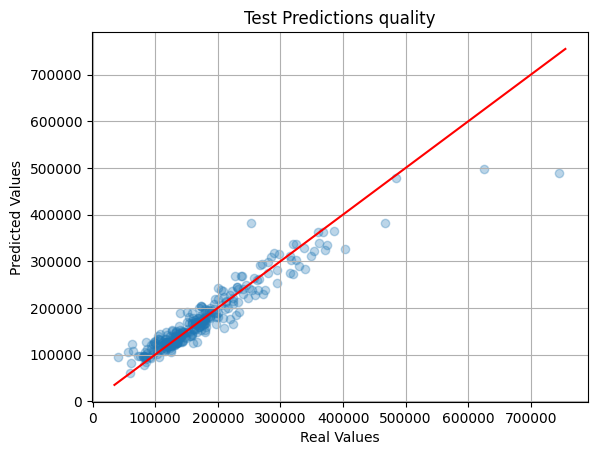

In [54]:
plt.grid()
plt.plot(range(min(y_train), max(y_train)), range(min(y_train), max(y_train)), c="red")
plt.scatter(y_test, test_prediction, alpha=0.3)
plt.title("Test Predictions quality")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")

plt.show();

In [59]:
feats_imp = zip(X_train.columns, forest.feature_importances_)
feats_imp = sorted(feats_imp, key=lambda x: x[1], reverse=True)
for feature, importance in feats_imp:
    print(f"{feature} : {importance}")

OverallQual : 0.5444752504667437
GrLivArea : 0.10966993368869205
TotalBsmtSF : 0.03429284403814558
1stFlrSF : 0.03248443178915141
BsmtFinSF1 : 0.03053375769241013
GarageCars : 0.030334642424656454
LotArea : 0.020837268873472887
GarageArea : 0.017188354131994796
2ndFlrSF : 0.015341867634981774
TotRmsAbvGrd : 0.013670592074309358
YearBuilt : 0.012853258127547656
ExterQual : 0.010082117343505689
Neighborhood : 0.009145731055056632
FullBath : 0.008776167424928882
LotFrontage : 0.006711912111237581
MoSold : 0.006414330543687582
YearRemodAdd : 0.006362625980138896
GarageFinish : 0.006242793259162793
GarageYrBlt : 0.005926897220435066
OpenPorchSF : 0.005376545983122221
MasVnrArea : 0.00527531221486805
BsmtQual : 0.004884045451013826
BsmtUnfSF : 0.004828477593210067
WoodDeckSF : 0.004648643246030707
OverallCond : 0.004321047861742274
KitchenQual : 0.0035013116205222074
GarageType : 0.002557858811409383
MSZoning : 0.0025121542581091716
Fireplaces : 0.0022973164501698183
Exterior1st : 0.00228043

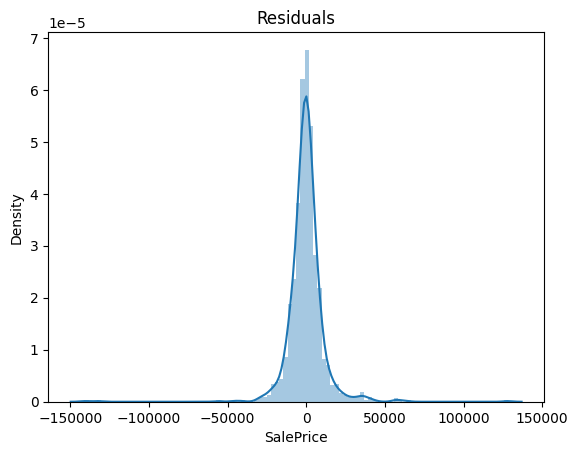

In [61]:
residuals = y_train - train_prediction
plt.title("Residuals")
sns.distplot(residuals, bins = 100);

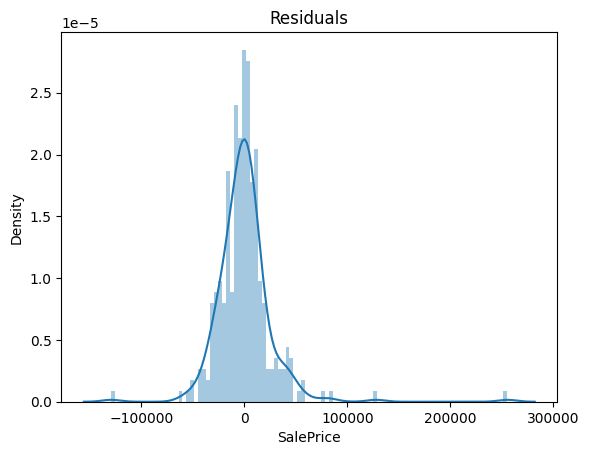

In [62]:
residuals = y_test - test_prediction
plt.title("Residuals")
sns.distplot(residuals, bins = 100);

In [64]:
cross_val_score(forest, X_test, y_test, cv=3).mean()

0.8526203962102343